# Agrupamento de Imóveis Para Aluguel Com K-Means

<br>

### Aluguel de Apartamentos

Alugar um apartamento tem sido a alternativa de moradia encontrada por muitas pessoas nas grandes cidades brasileiras. Em muitos casos a busca pelo aluguel de um imóvel com o perfil desejado acaba não sendo tarefa fácil, pois normalmente as pessoas levam em consideração não só os valores mensais de um aluguel, mas também fatores como o tamanho do imóvel e despesas como  o condomínio. A criação de grupos é uma alternativa que pode facilitar tanto a procura, quanto a oferta desses imóveis, considerando a inclusão dos atributos que levam os clientes a escolher alugar. Então como identificar grupos semelhantes de apartamentos para alugar? Um algoritmo como o K-Means pode auxiliar no agrupamento dos dados em grupos distintos.

### Modelo K-Means

O K-Means é um modelo que a partir dos seus dados, aprende como eles podem ser agrupados. Através de uma série de iterações, esse algoritmo é capaz identificar quais pontos de dados pertencem a cada um dos k clusters de um conjunto de dados. Os clusters criados devem possuir variância semelhante e que minimizam uma função de custo específica. Com a soma dos quadrados dentro do cluster como função de custo, os pontos de dados no mesmo cluster serão semelhantes entre si , enquanto os pontos de dados em diferentes clusters terão um grau menor de similaridade.

### Sobre os Dados
Os dados usados são referentes ao bairro Menino Deus, localizado no município brasileiro de Porto Alegre-RS. As informações sobre os apartamentos possuem os seguitnes atributos: valor do aluguel(em reais), area do imóvel(m²), número de quartos, número de banheiros e valor do condominio(em reais).

<br>

#### Importando Bibliotecas

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<br>

#### Importando Arquivo csv e Criando DataFrame

In [2]:
pd.read_csv('aluguel_aps.csv') # Importando arquivo csv
df = pd.read_csv('aluguel_aps.csv') # Criando DataFrame
df.head() # Exibindo primeiras linhas

,aluguel_reais,area_m2,n_quartos,banheiros,condominio_reais
0,1018,31,1,1,240
1,1035,80,2,1,240
2,1438,78,2,1,258
3,1990,112,2,3,900
4,2272,93,3,3,771


<br>

#### Explorando os Dados

Antes de realizar qualquer análise é importante primeiro entender o conjunto de dados a ser trabalhado atarvés de uma visão exploratória.

In [3]:
df.info() # Exibindo informações do conjunto de dados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   aluguel_reais     58 non-null     int64
 1   area_m2           58 non-null     int64
 2   n_quartos         58 non-null     int64
 3   banheiros         58 non-null     int64
 4   condominio_reais  58 non-null     int64
dtypes: int64(5)
memory usage: 2.4 KB


+ O arquivo possui 58 linhas e 5 colunas
+ Todas as colunas possuem dados com números inteiros(float64)
+ Não há dados nulos
+ O tamanho do arquivo é de 2.4KB

In [4]:
df.describe() # Estatística descritva dos dados

,aluguel_reais,area_m2,n_quartos,banheiros,condominio_reais
count,58.000000,58.000000,58.000000,58.000000,58.000000
mean,1416.896552,78.810345,2.017241,1.655172,449.103448
std,369.528514,33.638145,0.783411,0.738698,295.546339
min,791.000000,31.000000,1.000000,1.000000,148.000000
25%,1094.250000,57.750000,2.000000,1.000000,240.000000
50%,1438.500000,72.500000,2.000000,1.500000,332.500000
75%,1690.000000,92.500000,2.000000,2.000000,600.000000
max,2272.000000,207.000000,5.000000,3.000000,1800.000000


<br>

#### Visualização das Variáveis 
Traçando gráficos de linhas de todas as variáveis em relação ao aluguel dos apartamentos para saber se  há correlação entre os diferentes recursos.

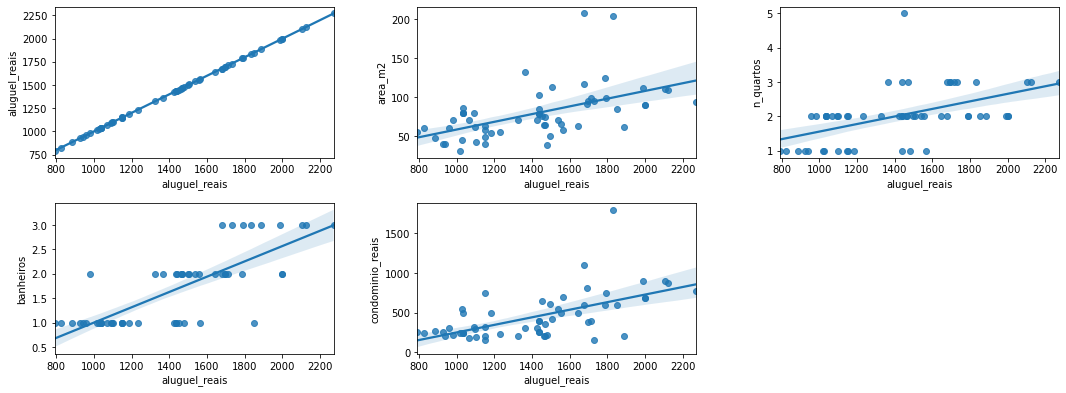

In [5]:
plt.figure(1, figsize=(18,10))
n = 0
for x in ['aluguel_reais']:
    for y in ['aluguel_reais','area_m2', 'n_quartos', 'banheiros', 'condominio_reais']:
        n += 1
        plt.subplot(3 , 3, n )
        plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
        sns.regplot(x = x , y = y , data = df)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

Os gráficos sobre os atributos área e condomínio exibem boa correlação linear com o valor dos aluguéis, já as demais variáveis não apresentam uma correlação adequada para compor os agrupamentos. A quantidade de quartos e banheiros não parecem estar relacionada de forma siginificativa com o valor dos aluguéis.

<br>

#### Realizando a Modelagem

Para saber qual a quantidade de cluster mais adequada, é necessário ter um bom parâmetro. O método Elbow é usado na determinação do número de clusters em um conjunto de dados. Esse método consiste em plotar a variação explicada em função da quantidade de clusters e escolher o cotovelo da curva como o número de clusters a serem usados.

Aplicando o método Elbow junto as váriaveis que melhor se adequam aos clusters, são elas: "aluguel_reais", "area_m2" e "condominio_reais".

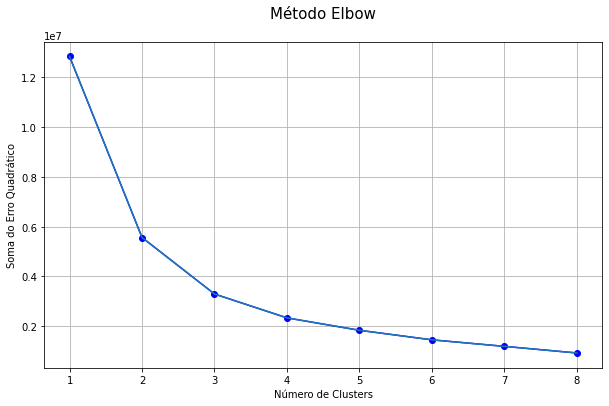

In [6]:
sse = []
for k in range(1,9):
    km = KMeans(n_clusters=k)
    km.fit(df[['aluguel_reais','area_m2', 'condominio_reais']])
    sse.append(km.inertia_)

plt.figure(1 , figsize = (10 ,6))
plt.plot(range(1,9), sse, 'bo-')
plt.title('Método Elbow\n', loc='center', fontsize=15)
plt.xlabel('Número de Clusters')
plt.ylabel('Soma do Erro Quadrático')
plt.grid()
plt.plot(range(1,9), sse)

O gráfico acima é o resultado da execução do agrupamento K-Means no conjunto de dados do treino com valores de k correspondentes ao tamanho do conjunto de dados. Nesse conjunto de dados o cotovelo da curva é em torno de k = 3, o que significa que vamos gerar três grupos a partir do nosso modelo.

<br>

Criando uma instância do modelo K-Means para encontrar três clusters.

In [7]:
km = KMeans(n_clusters=3)

Agrupando as previsões do conjunto de dados com "fit_predict".

In [8]:
clusters = km.fit_predict(df[['aluguel_reais', 'area_m2',  'condominio_reais']])
clusters

array([0, 0, 2, 1, 1, 0, 1, 0, 1, 1, 2, 0, 0, 2, 2, 0, 0, 0, 2, 2, 1, 2,
       2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 2, 1, 0, 1, 0, 2, 1,
       1, 0, 2, 2, 0, 0, 2, 2, 2, 1, 1, 2, 0, 2])

Armazenando os clusters criados junto ao conjunto de dados.

In [9]:
df['clusters'] = clusters
df.head()

,aluguel_reais,area_m2,n_quartos,banheiros,condominio_reais,clusters
0,1018,31,1,1,240,0
1,1035,80,2,1,240,0
2,1438,78,2,1,258,2
3,1990,112,2,3,900,1
4,2272,93,3,3,771,1


O K-Means agrupa dados tentando separar amostras em n grupos de variâncias iguais, fazendo com os clusters sejam internamente coerentes. Os meios desses grupos são chamados de centróides, o K-Means visa escolher centróides que minimizem a soma dos quadrados dentro do cluster.

In [10]:
km.cluster_centers_

array([[1037.39130435,   58.39130435,  297.69565217],
       [1926.5       ,  117.75      ,  871.75      ],
       [1530.52173913,   78.91304348,  380.        ]])

<br>

#### Visualizando os Clusters
Exibindo os agrupamentos gerados com modelo K-Means em um gráfico de disperssão tendo as variáveis aluguel e área eixos.

Text(0, 0.5, 'Aluguel (R$)')

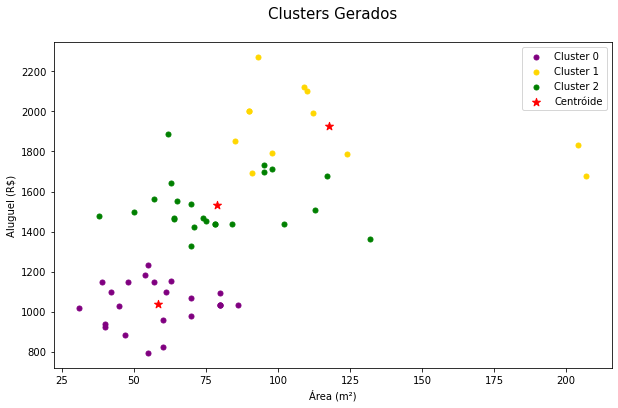

In [13]:
df1 = df[df.clusters==0]
df2 = df[df.clusters==1]
df3 = df[df.clusters==2]

plt.figure(1, figsize=(10,6))

plt.scatter(df1['area_m2'], df1['aluguel_reais'], c='purple', s=25, label='Cluster 0')
plt.scatter(df2['area_m2'], df2['aluguel_reais'], c='gold', s=25, label='Cluster 1')
plt.scatter(df3['area_m2'], df3['aluguel_reais'], c='green', s=25,label='Cluster 2')

plt.scatter(km.cluster_centers_[:,1], km.cluster_centers_[:,0], c='red', marker='*', s=70, label='Centróide')
plt.legend()

plt.title('Clusters Gerados\n', loc='center', fontsize=15)
plt.xlabel('Área (m²)')
plt.ylabel('Aluguel (R$)')

Os clusters 0 e 1 mostram uma diferenciação siginificativa em todos os atributos, principalmente em relação ao valor dos aluguéis e área dos apartamentos. O grupo 1 apresenta amostras com áreas dos imóveis presentes nos outros dois clusters, se diferenciando quanto ao valor dos aluguéis.

<br>

### Conclusões

+ A partir da análise exploratória do conjunto de dados, foram escohidos os atributos que mais apresentaram adecuação para compor a modelagem do algoritimo K-Means. Esses atributos foram: "Valor do Aluguel", "Área do Imóvel" e "Valor do Condomínio".


+ A quantide de grupos foi escolhida por meio da utilização do método Elbow, que apontou o número de três clusters como o ideal.


+ Os resultados da distribuição dos clusters apontam que os clusters 0 e 1 são diferentes em todos atributos, sobretudo nos valores dos aluguéis e tamanho dos imóveis. O grupo 1 abrange caracteristicas similares de parte dos outros dois clusters, mas tendo ao valor dos aluguéis distinto entre os três grupos.


+ Os clusters gerados pelo modelo K-Means mostraram que podem auxiliar as pessoas a identificar grupos semelhantes de apartamentos para alugar, sendo possível realizar uma escolha de forma mais prática. Um bom exemplo, é quem procura por um apartamento com uma área maior e com um aluguel mais em conta no bairro Menino Deus, perceberá que existem imóveis disponiveis no grupo 1 com áreas semhelhantes ao do grupo 2, mas com alguéis bem menores.

<br>